# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key



In [2]:
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "weatherpy_cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

In [4]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [5]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

In [6]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID="+weather_api_key
units = "metric"


In [8]:
# Define an empty list to fetch the weather data for each city
city_data = []
# Create empty lists to store the data for each field
city_names = []
countries = []
lat_ls = []
lng_ls = []
temp_ls = []
humidity_ls = []
cloudiness_ls = []
wind_speeds = []
dates = []




In [9]:
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

#create Counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}&appid={weather_api_key}&units={units}&q={city}"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
 

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() # YOUR CODE HERE
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]['lat']
        city_lng = city_weather["coord"]['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#     If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chokurdakh
Processing Record 2 of Set 1 | upata
Processing Record 3 of Set 1 | nikolskoye
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | paralimni
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | grindavik
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | arraial do cabo
Processing Record 11 of Set 1 | meadow lake
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | leningradskiy
Processing Record 15 of Set 1 | castro
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | sistranda
Processing Record 18 of Set 1 | faanui
Processing Record 19 of Set 1 | lysychovo
Processing Record 20 of Set 1 | ranong
Processing Record 21 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 22 of Set 1 | tupik
Proce

Processing Record 35 of Set 4 | najran
Processing Record 36 of Set 4 | port blair
Processing Record 37 of Set 4 | esperance
Processing Record 38 of Set 4 | mandalgovi
Processing Record 39 of Set 4 | imphal
Processing Record 40 of Set 4 | tasiilaq
Processing Record 41 of Set 4 | durban
Processing Record 42 of Set 4 | tuatapere
Processing Record 43 of Set 4 | ghatanji
Processing Record 44 of Set 4 | aklavik
Processing Record 45 of Set 4 | luzhou
Processing Record 46 of Set 4 | xining
Processing Record 47 of Set 4 | mehamn
Processing Record 48 of Set 4 | carnarvon
Processing Record 49 of Set 4 | iralaya
Processing Record 0 of Set 5 | yumen
Processing Record 1 of Set 5 | ilulissat
Processing Record 2 of Set 5 | toyooka
Processing Record 3 of Set 5 | pringsewu
Processing Record 4 of Set 5 | kopyevo
City not found. Skipping...
Processing Record 5 of Set 5 | hamilton
Processing Record 6 of Set 5 | lakhdenpokhya
Processing Record 7 of Set 5 | guanica
Processing Record 8 of Set 5 | filadelfia
P

Processing Record 26 of Set 8 | zheleznodorozhnyy
Processing Record 27 of Set 8 | bireun
Processing Record 28 of Set 8 | kassala
Processing Record 29 of Set 8 | bodaybo
Processing Record 30 of Set 8 | touros
Processing Record 31 of Set 8 | makakilo city
Processing Record 32 of Set 8 | klaksvik
Processing Record 33 of Set 8 | pleasanton
Processing Record 34 of Set 8 | fare
Processing Record 35 of Set 8 | dunmore east
Processing Record 36 of Set 8 | mezen
Processing Record 37 of Set 8 | avera
Processing Record 38 of Set 8 | ilhabela
Processing Record 39 of Set 8 | oranjemund
Processing Record 40 of Set 8 | qasigiannguit
Processing Record 41 of Set 8 | katsuura
Processing Record 42 of Set 8 | shenjiamen
Processing Record 43 of Set 8 | boshnyakovo
Processing Record 44 of Set 8 | resistencia
Processing Record 45 of Set 8 | chuy
Processing Record 46 of Set 8 | yibin
Processing Record 47 of Set 8 | kavieng
Processing Record 48 of Set 8 | camana
Processing Record 49 of Set 8 | hambantota
Proce

Processing Record 14 of Set 12 | buraydah
Processing Record 15 of Set 12 | sur
Processing Record 16 of Set 12 | santa isabel do rio negro
Processing Record 17 of Set 12 | charlottesville
Processing Record 18 of Set 12 | manaure
Processing Record 19 of Set 12 | outjo
Processing Record 20 of Set 12 | warri
Processing Record 21 of Set 12 | nyurba
Processing Record 22 of Set 12 | omsukchan
Processing Record 23 of Set 12 | lokoja
Processing Record 24 of Set 12 | tual
Processing Record 25 of Set 12 | ferkessedougou
Processing Record 26 of Set 12 | dongsheng
Processing Record 27 of Set 12 | zhanakorgan
Processing Record 28 of Set 12 | mixtequilla
City not found. Skipping...
Processing Record 29 of Set 12 | plettenberg bay
Processing Record 30 of Set 12 | miro khan
Processing Record 31 of Set 12 | karratha
Processing Record 32 of Set 12 | aykhal
Processing Record 33 of Set 12 | aasiaat
Processing Record 34 of Set 12 | constitucion
Processing Record 35 of Set 12 | poopo
Processing Record 36 of 

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chokurdakh,70.6333,147.9167,-35.09,99,100,3.47,RU,1675830135
1,upata,8.0086,-62.3989,71.19,94,0,4.12,VE,1675830136
2,nikolskoye,59.7035,30.7861,30.09,86,100,9.71,RU,1675830137
3,hilo,19.7297,-155.0900,74.28,91,100,6.91,US,1675830138
4,yellowknife,62.4560,-114.3525,-3.44,84,100,6.91,CA,1675830138


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chokurdakh,70.6333,147.9167,-35.09,99,100,3.47,RU,1675830135
1,upata,8.0086,-62.3989,71.19,94,0,4.12,VE,1675830136
2,nikolskoye,59.7035,30.7861,30.09,86,100,9.71,RU,1675830137
3,hilo,19.7297,-155.0900,74.28,91,100,6.91,US,1675830138
4,yellowknife,62.4560,-114.3525,-3.44,84,100,6.91,CA,1675830138


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

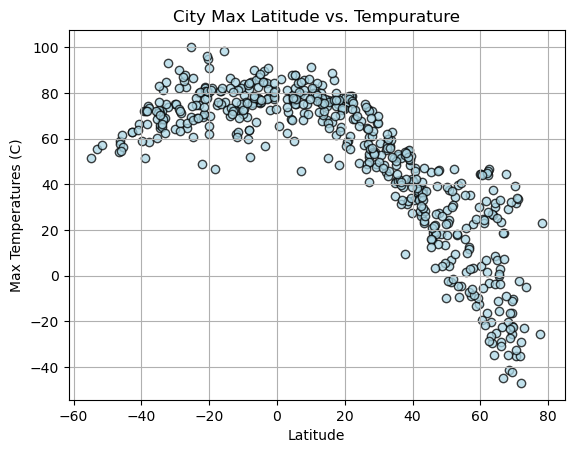

In [14]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = "o", facecolor = "lightblue", edgecolor = "black", alpha=0.75)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Tempurature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperatures (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

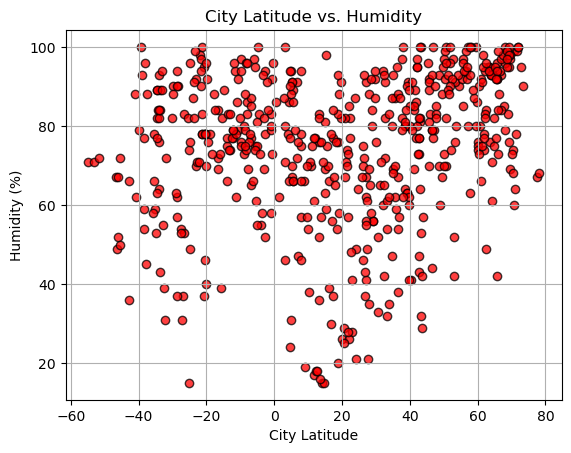

In [15]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = "o", color = "red", edgecolor = "black", alpha=0.75)

# Incorporate the other graph properties
# YOUR CODE HERE

plt.title("City Latitude vs. Humidity")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)



# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

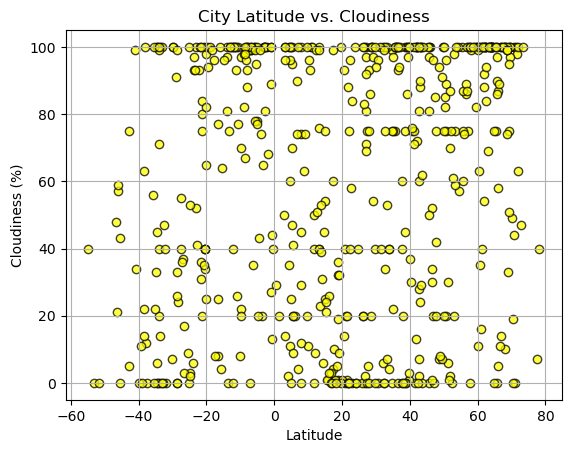

In [16]:
# Build the scatter plots for latitude vs. cloudiness

plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = "o", color = "yellow", edgecolor = "black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

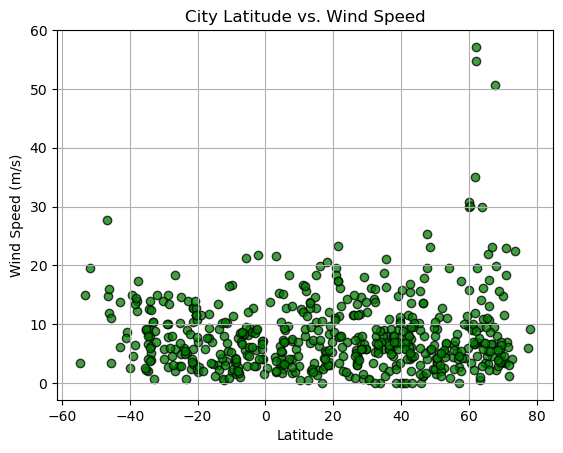

In [17]:
# Build the scatter plots for latitude vs. wind speed

plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = "o", color = "green", edgecolor = "black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots



In [19]:
def lineregress_plot():
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regression = x_value * slope + intercept
    line_eq_coor = ( xc, yc)

    line_eq = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
    plt.scatter(x_value, y_value, marker='o', color='yellow', edgecolors='black')
    plt.plot(x_value, regression, color='red', linewidth=3)
    plt.annotate(line_eq, line_eq_coor, fontsize=16, color="red")
    plt.grid(True)
    print(f"The r-value is: {rvalue}")

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

n_hemisphere_df = city_data_df[(city_data_df["Lat"] >= 0)]

# Display sample data
n_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chokurdakh,70.6333,147.9167,-35.09,99,100,3.47,RU,1675830135
1,upata,8.0086,-62.3989,71.19,94,0,4.12,VE,1675830136
2,nikolskoye,59.7035,30.7861,30.09,86,100,9.71,RU,1675830137
3,hilo,19.7297,-155.0900,74.28,91,100,6.91,US,1675830138
4,yellowknife,62.4560,-114.3525,-3.44,84,100,6.91,CA,1675830138


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
s_hemisphere_df = city_data_df[(city_data_df["Lat"] < 0)]
s_hemisphere_df.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,bluff,-46.6000,168.3333,53.98,67,48,27.63,NZ,1675830139
8,rikitea,-23.1203,-134.9692,79.79,70,52,8.95,PF,1675830140
9,arraial do cabo,-22.9661,-42.0278,74.66,92,100,5.06,BR,1675830141
11,puerto ayora,-0.7393,-90.3518,78.55,92,44,4.00,EC,1675830028
14,castro,-24.7911,-50.0119,60.91,96,53,4.92,BR,1675830143


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8739792904737431


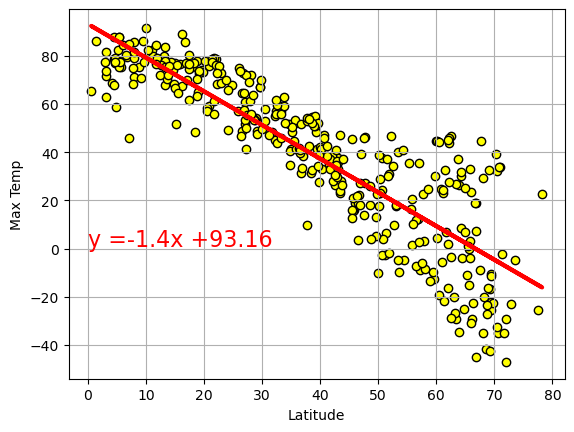

In [22]:
# Linear regression on Northern Hemisphere
x_value = n_hemisphere_df["Lat"]
y_value = n_hemisphere_df["Max Temp"]
xc = 0
yc = 1

lineregress_plot()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

The r-value is: 0.44501612495856496


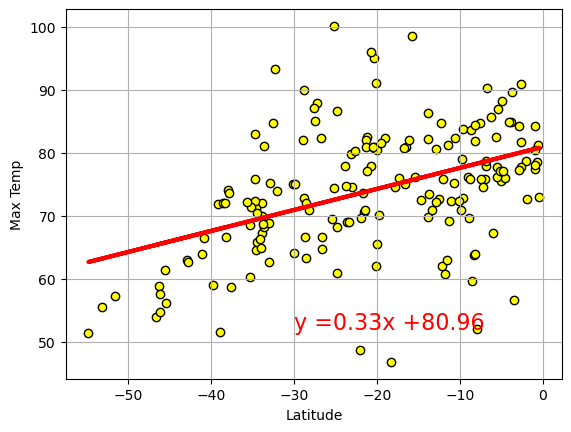

In [23]:
# Linear regression on Southern Hemisphere
x_value = s_hemisphere_df["Lat"]
y_value = s_hemisphere_df["Max Temp"]
xc = -30
yc = 52

lineregress_plot()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

**Discussion about the linear relationship:** The northern hemisphere has as negative correlation, while the southern hemisphere has a slighty positive correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4169655840885676


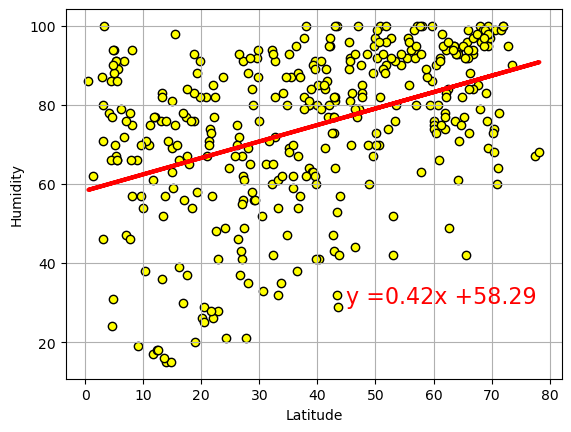

In [24]:
# Northern Hemisphere
x_value = n_hemisphere_df["Lat"]
y_value = n_hemisphere_df["Humidity"]
xc = 45
yc = 30

lineregress_plot()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-value is: 0.236584006406587


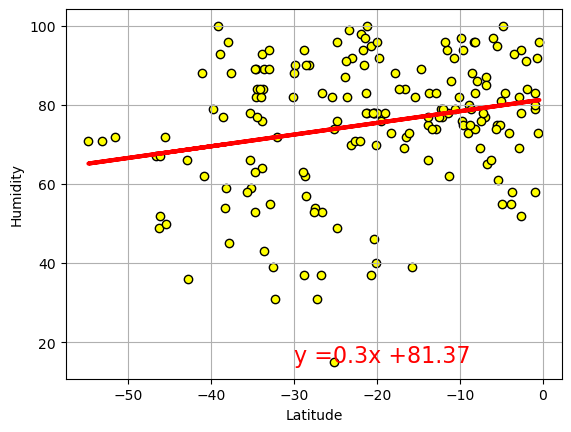

In [25]:
x_value = s_hemisphere_df["Lat"]
y_value = s_hemisphere_df["Humidity"]
xc = -30
yc = 15

lineregress_plot()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** Both Northern & Southern Hemisphere have positive correlations with hummidity and latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2767186705153314


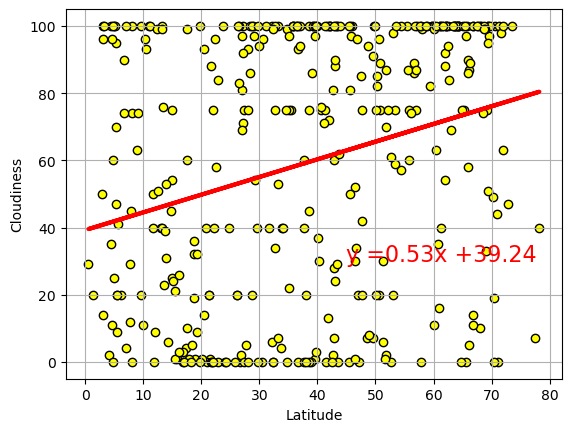

In [26]:
x_value = n_hemisphere_df["Lat"]
y_value = n_hemisphere_df["Cloudiness"]
xc = 45
yc = 30

lineregress_plot()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-value is: 0.41131092602160085


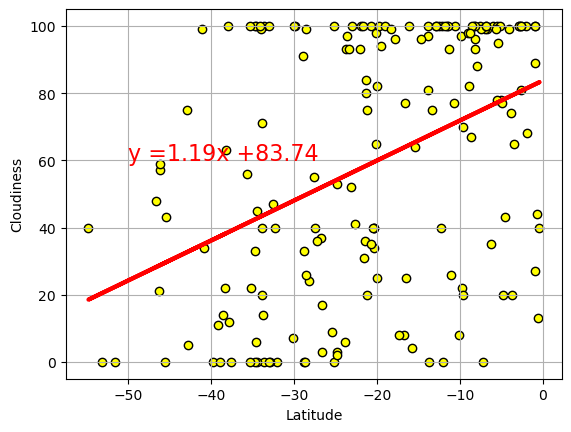

In [27]:
x_value = s_hemisphere_df["Lat"]
y_value = s_hemisphere_df["Cloudiness"]
xc = -50
yc = 60

lineregress_plot()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** Both hemispheres are showing a positive correlation with cloudiness of their locations. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.11430097923717382


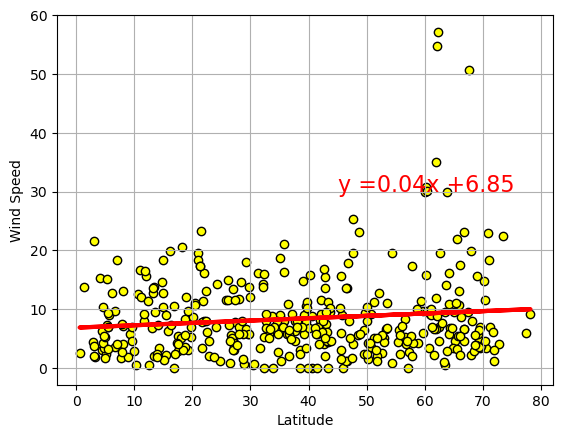

In [28]:
# Northern Hemisphere
x_value = n_hemisphere_df["Lat"]
y_value = n_hemisphere_df["Wind Speed"]
xc = 45
yc = 30

lineregress_plot()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r-value is: -0.2683805015379639


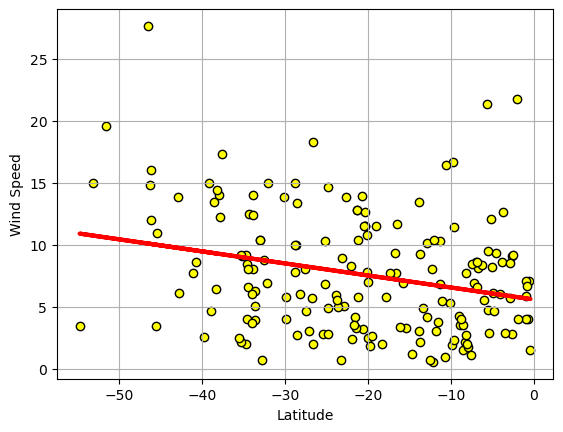

In [29]:
x_value= s_hemisphere_df["Lat"]
y_value = s_hemisphere_df["Wind Speed"]
xc = -45
yc = 30

lineregress_plot()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** The northern hemisphere does not have a correlation with wind speed, while the southern hemisphere has a slight negative correlation with wind speed and latitudes.